In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import h5py
import pygpe.scalar as gpe
import numpy as np
%matplotlib inline

In [2]:
# Load the model
model = keras.models.load_model('vortex_detection/')

In [3]:
# Load test data
test_data = h5py.File('../data/test_data.hdf5', 'r')
phases_test = test_data['phases']
positions_test = test_data['positions']

# What is the model trying to predict?
The model makes a prediction on the location of the vortices based on the condensate phase, a $256\times256$ array of floats.
It attempts to correctly identify both vortices and anti-vortices, depending on the winding of the phase.

## Visualising the condensate phase

In [4]:
def plot_phase(ax_, index):
    # Visualise the result
    grid = gpe.Grid((256, 256), (0.5, 0.5))

    ax_.set_xlim(-grid.length_x // 2, grid.length_x // 2)
    ax_.set_ylim(-grid.length_y // 2, grid.length_y // 2)

    # Plot random phase from test data
    phase_image = ax_.pcolormesh(grid.x_mesh, grid.y_mesh, phases_test[index, :, :, 0], cmap='binary')

    # Set up colour bar
    cbar = plt.colorbar(phase_image, ax=ax_)
    cbar.set_ticks([-np.pi, 0., np.pi])
    cbar.set_ticklabels([r'$-\pi$', '0', r'$\pi$'])
    cbar.set_label('Condensate phase')


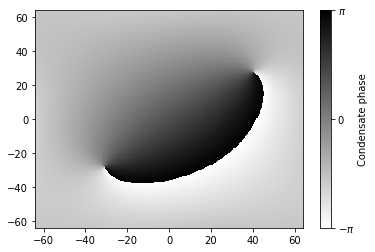

In [5]:
# Visualise the result
fig, ax = plt.subplots(1, )

random_index = np.random.randint(0, phases_test.shape[0])
plot_phase(ax, random_index)

The positions of the vortices are obvious to use humans, they're at the points where the phase winds by $2\pi$.
A vortex is defined as an anti-clockwise winding of the phase, whereas an anti-vortex is defined as a clockwise winding of the phase. Confusing, I know...

The model is trained to locate the positions of these windings as best it can, then output *four* values corresponding to (anti-vortex x position, vortex x position, anti-vortex y position, vortex y position).

# Testing the models predictions

In [6]:
# Predict on test data
positions_pred = model.predict(phases_test[...])

4/4 [==============================] - 12s 55ms/step


[-31.24722   40.87772  -26.664555  26.17426 ]
[-31.0032662   40.53751658 -28.31970775  27.61047868]


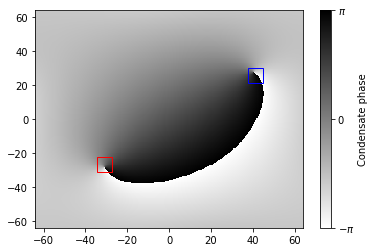

In [7]:
# Visualise the predictions
antivortex_x, vortex_x, antivortex_y, vortex_y, = positions_pred[random_index]

print(positions_pred[random_index])
print(positions_test[random_index])
ax.plot(vortex_x, vortex_y, 'bs', markersize=15, fillstyle='none')
ax.plot(antivortex_x, antivortex_y, 'rs', markersize=15, fillstyle='none')
fig

Amazing! The model very accurately predicts the locations of the vortices, and correctly predicts the positive (blue square) and negative (red square) circulations.